In [15]:
# Dependencies
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [16]:
#read the merged crime and weather data from saved files   
merged_table = pd.read_csv('./Resources/merged_crime_and_weather_data.csv')
merged_table['date'] = pd.to_datetime(merged_table['date'])
merged_table['temp'] = merged_table['temp'].astype('int')

In [17]:
merged_table.head()

,date,primary_type,temp,date_trunc,year
0,2015-12-31 23:00:00,THEFT,24,2015-12-31 00:00:00,2015.0
1,2015-12-31 23:00:00,CRIMINAL DAMAGE,24,2015-12-31 00:00:00,2015.0
2,2015-12-31 23:00:00,BATTERY,24,2015-12-31 00:00:00,2015.0
3,2015-12-31 23:00:00,THEFT,24,2015-12-31 00:00:00,2015.0
4,2015-12-31 23:00:00,BATTERY,24,2015-12-31 00:00:00,2015.0


In [18]:
merged_table.dtypes

date            datetime64[ns]
primary_type            object
temp                     int32
date_trunc              object
year                   float64
dtype: object

In [19]:
merged_table.describe()

,temp,year
count,801551.000000,801551.000000
mean,55.073808,2016.004974
std,19.769245,0.814971
min,-8.000000,2015.000000
25%,40.000000,2015.000000
50%,57.000000,2016.000000
75%,72.000000,2017.000000
max,95.000000,2017.000000


In [20]:
# Graph the top 10 crimes over 2015-2017
# Use this for drilling into crime type
# source reference:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
subset = merged_table[['primary_type','year']]
subset.rename(columns={'primary_type':'primary_type','year': "crime_count"},inplace=True)
grouped_crime_df = subset.groupby(['primary_type']).count()
grouped_crime_df=grouped_crime_df.sort_values(by=['crime_count'],ascending=False)
grouped_crime_df = grouped_crime_df.reset_index()
grouped_crime_df = grouped_crime_df.head(10)

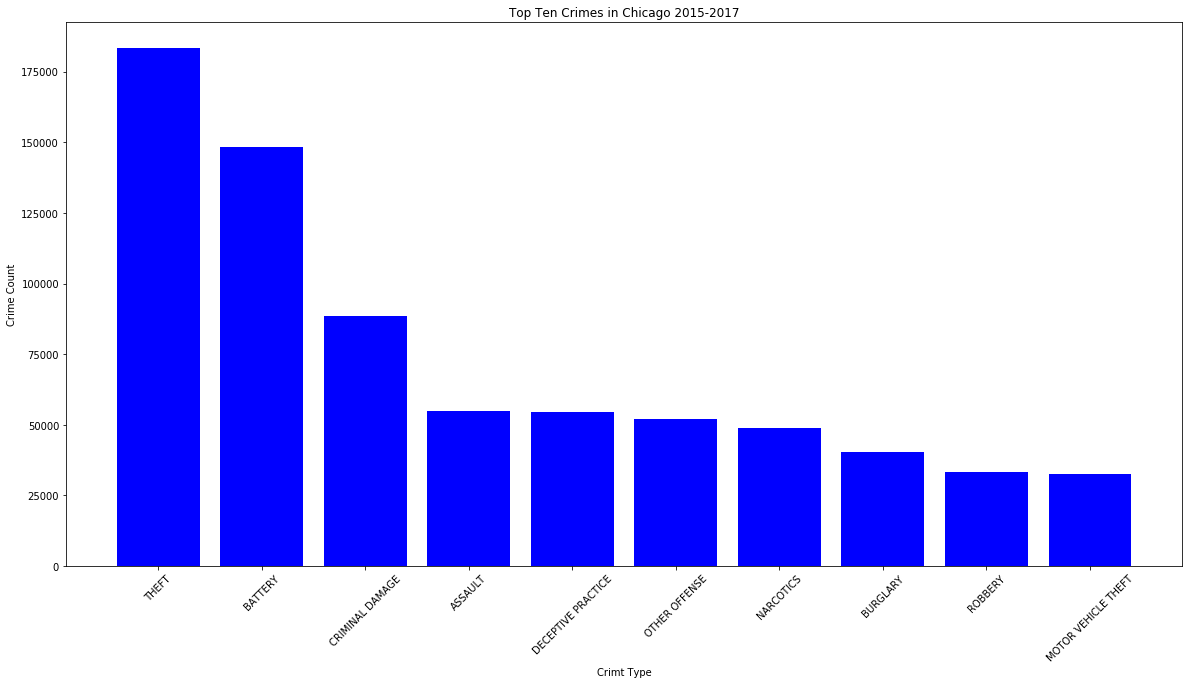

In [21]:
#Source reference on fig size
# https://stackabuse.com/python-data-visualization-with-matplotlib/
crimes = grouped_crime_df['primary_type']
x_axis = np.arange(len(crimes))
y_axis = grouped_crime_df['crime_count']

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

# Labels and titles
plt.title("Top Ten Crimes in Chicago 2015-2017")
plt.xlabel("Crimt Type")
plt.ylabel("Crime Count")

# Create a bar chart based upon the above data
plt.bar(x_axis, y_axis, color="b", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, crimes,rotation=45)

#save our chart
plt.savefig("./Images/bar_top_10_chicago_crimes.png")

In [22]:
# Using GroupBy in order to separate the data into fields according to "temperature" values
# source reference:
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
subset = merged_table[['temp','year']]
grouped_crime_df = subset.groupby(['temp']).count()

In [23]:
#Create a line chart of Crime Rate (count) by Temperature
grouped_crime_df = grouped_crime_df.reset_index()
x_axis = grouped_crime_df['temp']
y_axis = grouped_crime_df['year']

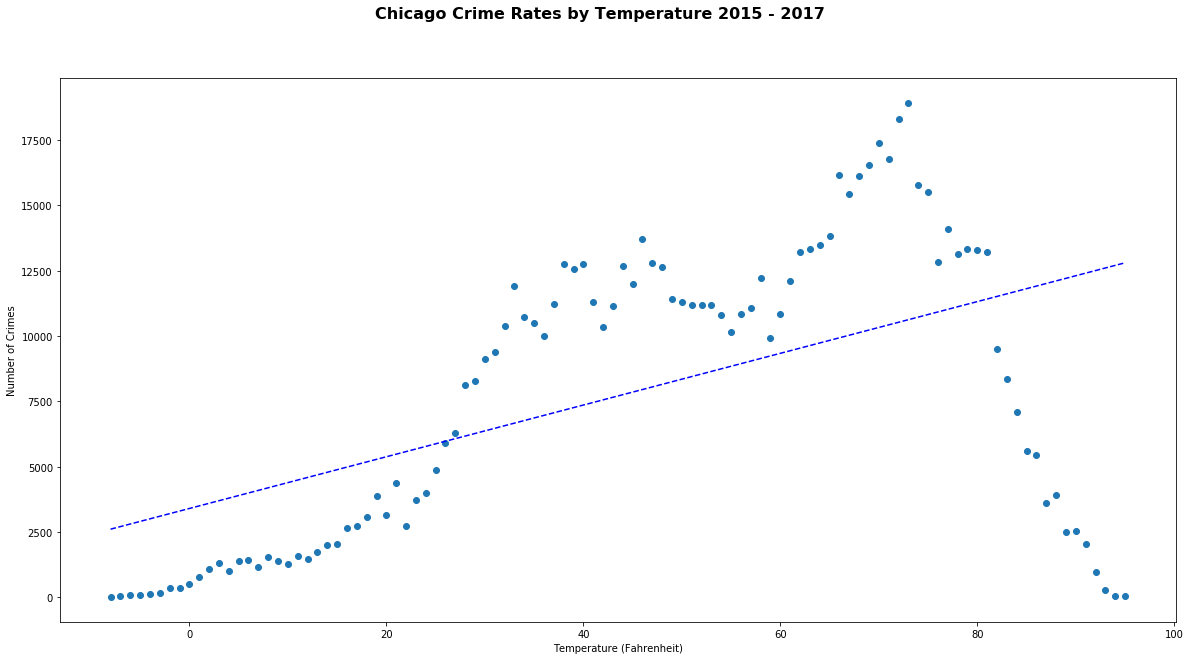

In [24]:
# Create a graph based upon the temperature and number of crimes
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Chicago Crime Rates by Temperature 2015 - 2017", fontsize=16, fontweight="bold")

ax.set_xlabel("Temperature (Fahrenheit)")
ax.set_ylabel("Number of Crimes")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.rcParams["figure.figsize"] = fig_size
# save then show
plt.savefig("./Images/scatter_crime_by_temp.png")
plt.show()

In [25]:
# Bin the crime count by temperature ranges of 10 to better see the crime distribution by temperature
bins = [0,10, 20, 30, 40, 50, 60,70,80,90,100]
# Create the names for the four bins
group_names = ["0","10", "20", "30", "40", "50", "60","70","80","90"]

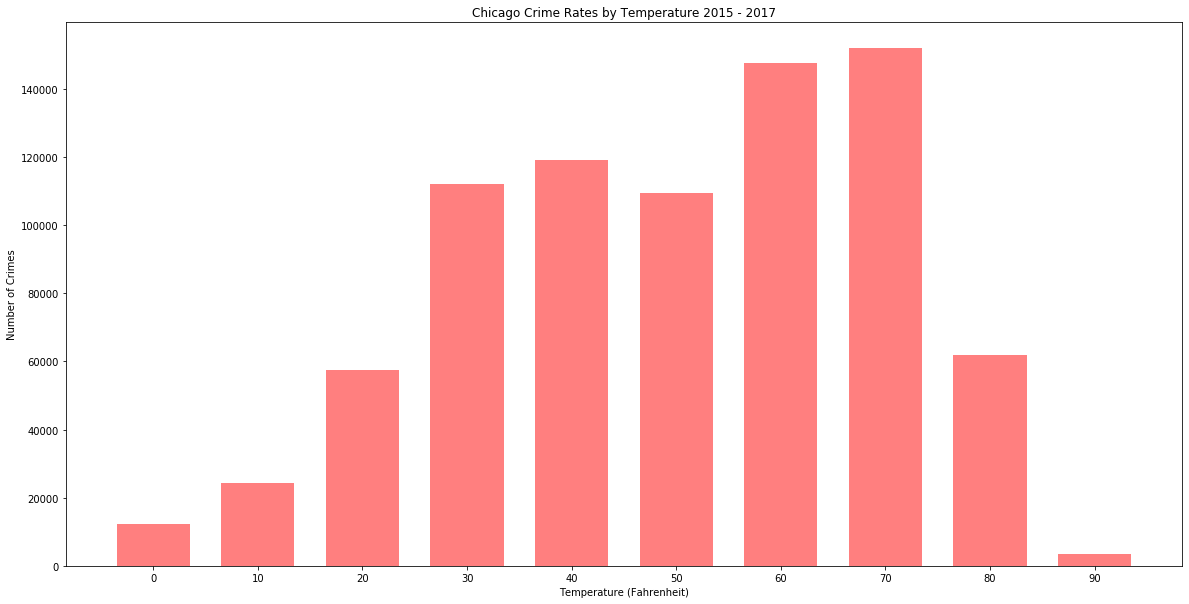

In [26]:
merged_table["Temp Summary"] = pd.cut(merged_table["temp"], bins, labels=group_names)
grouped_crime_df = merged_table.groupby(['Temp Summary']).count()
grouped_crime_df = grouped_crime_df.reset_index()
x_axis = np.arange(0,100,10)
y_axis = grouped_crime_df['date']
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center", width=7)

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis)

# Add labels to the x and y axes
plt.title("Chicago Crime Rates by Temperature 2015 - 2017")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Number of Crimes")
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("./Images/bar_binned_crime.png")

In [27]:
merged_table['primary_type'].unique()

array(['THEFT', 'CRIMINAL DAMAGE', 'BATTERY', 'OTHER OFFENSE',
       'MOTOR VEHICLE THEFT', 'ROBBERY', 'WEAPONS VIOLATION',
       'CRIM SEXUAL ASSAULT', 'ASSAULT', 'BURGLARY', 'DECEPTIVE PRACTICE',
       'NARCOTICS', 'CRIMINAL TRESPASS', 'OFFENSE INVOLVING CHILDREN',
       'SEX OFFENSE', 'ARSON', 'PUBLIC PEACE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PROSTITUTION',
       'LIQUOR LAW VIOLATION', 'HOMICIDE', 'INTIMIDATION', 'KIDNAPPING',
       'OBSCENITY', 'STALKING', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'NON - CRIMINAL', 'CONCEALED CARRY LICENSE VIOLATION', 'GAMBLING',
       'HUMAN TRAFFICKING', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

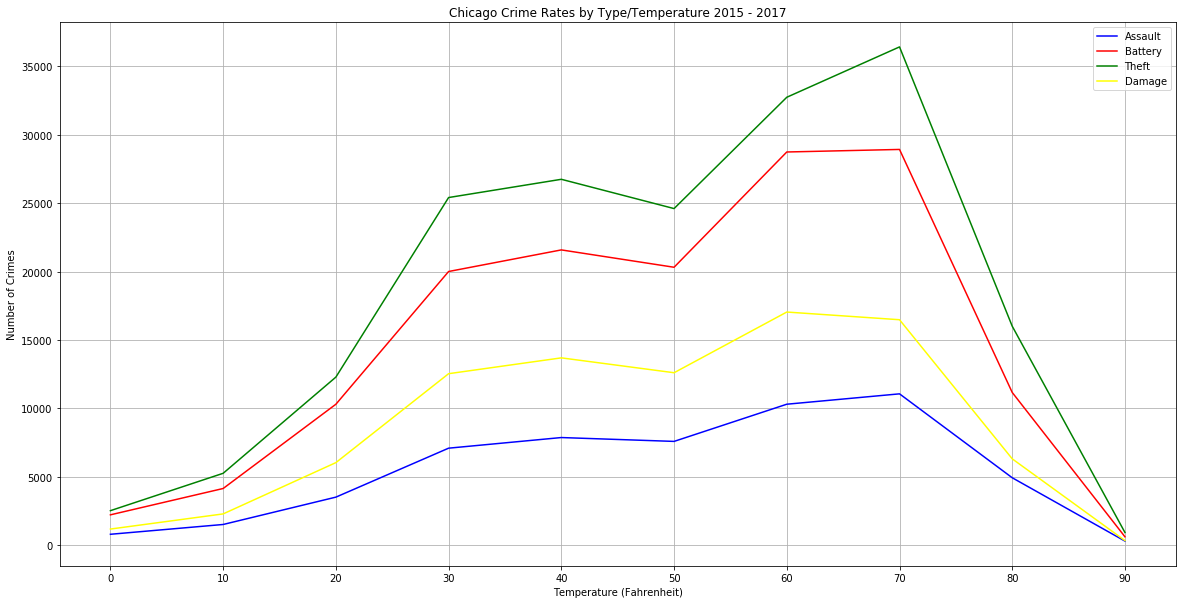

In [28]:
# Compare the crime rates by temperatue for the top 4 crime types
grouped_crime_df = merged_table.groupby(['Temp Summary','primary_type']).count()
grouped_crime_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
grouped_crime_df = grouped_crime_df.reset_index()

x_axis = np.arange(0,100,10)

assault = grouped_crime_df['date'][grouped_crime_df['primary_type'] == 'ASSAULT']
battery = grouped_crime_df['date'][grouped_crime_df['primary_type'] == 'BATTERY']
theft = grouped_crime_df['date'][grouped_crime_df['primary_type'] == 'THEFT']
damage = grouped_crime_df['date'][grouped_crime_df['primary_type'] == 'CRIMINAL DAMAGE']

# Add labels to the x and y axes
plt.title("Chicago Crime Rates by Type/Temperature 2015 - 2017")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Number of Crimes")

# Set a grid on the plot
plt.grid()
plt.rcParams["figure.figsize"] = fig_size

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis)

# Create a handle for each plot
a, = plt.plot(x_axis, assault,  color="blue", label='Assault')
b, = plt.plot(x_axis, battery,  color="red", label='Battery')
t, = plt.plot(x_axis, theft, color="green", label='Theft')
d, = plt.plot(x_axis, damage, color="yellow", label='Damage')

# Set our legend to where the chart thinks is best
plt.legend(handles=[a, b,t,d], loc="best")
plt.savefig("./Images/line_top_four_by_temp.png")